In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 11

In [46]:
df = pd.read_csv('datasets_727551_1263738_heart_failure_clinical_records_dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [8]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop('DEATH_EVENT', axis = 1).values
y = df['DEATH_EVENT'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=105)

In [48]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
X_train = scaler.transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
model = MultinomialNB()

In [53]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
pred = model.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        55
           1       1.00      0.05      0.10        20

    accuracy                           0.75        75
   macro avg       0.87      0.53      0.47        75
weighted avg       0.81      0.75      0.65        75



In [41]:
print(confusion_matrix(y_test, pred))

[[55  0]
 [19  1]]


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model_1 = LogisticRegression()

In [60]:
model_1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
log_pred = model_1.predict(X_test)

In [62]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        55
           1       0.73      0.55      0.63        20

    accuracy                           0.83        75
   macro avg       0.79      0.74      0.76        75
weighted avg       0.82      0.83      0.82        75



In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
error = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    error.append(np.mean(k_pred!=y_test))

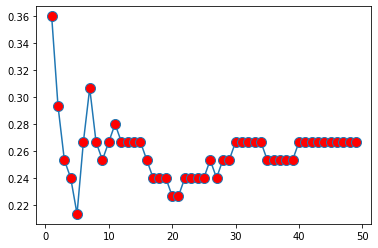

In [69]:
plt.plot(range(1,50), error, markersize = 10, markerfacecolor = 'r', marker = 'o')

In [70]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

In [71]:
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        55
           1       0.70      0.35      0.47        20

    accuracy                           0.79        75
   macro avg       0.75      0.65      0.67        75
weighted avg       0.77      0.79      0.76        75



In [72]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
r_model = RandomForestClassifier(n_estimators= 41)

In [117]:
error = []

for i in range(1,100):
    r_model = RandomForestClassifier(n_estimators= i)
    r_model.fit(X_train, y_train)
    r_pred = r_model.predict(X_test)
    error.append(np.mean(r_pred!=y_test))

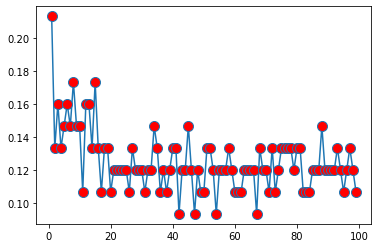

In [118]:
plt.plot(range(1,100), error, markersize = 10, markerfacecolor = 'r', marker = 'o')

In [92]:
v = pd.DataFrame(error)

In [121]:
r_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
r_pred = r_model.predict(X_test)

In [123]:
print(classification_report(y_test, r_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.78      0.90      0.84        20

    accuracy                           0.91        75
   macro avg       0.87      0.90      0.89        75
weighted avg       0.91      0.91      0.91        75



In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
tree = DecisionTreeClassifier()

In [127]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [128]:
tr_pred = tree.predict(X_test)

In [129]:
print(classification_report(y_test, tr_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        55
           1       0.67      0.70      0.68        20

    accuracy                           0.83        75
   macro avg       0.78      0.79      0.78        75
weighted avg       0.83      0.83      0.83        75



In [130]:
from sklearn.svm import SVC

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
param = {'C': [0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001] }

In [136]:
grid = GridSearchCV(estimator= SVC(), param_grid= param, verbose= 1)

In [138]:
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [139]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [141]:
svc = SVC(C = 100, gamma =0.01, )

In [142]:
svc.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [143]:
svc_pred = svc.predict(X_test)

In [145]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        55
           1       0.75      0.60      0.67        20

    accuracy                           0.84        75
   macro avg       0.81      0.76      0.78        75
weighted avg       0.83      0.84      0.83        75



In [155]:
from sklearn.datasets import load_boston

In [156]:
data = load_boston()

In [157]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [161]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [162]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [164]:
new_data = pd.DataFrame(data = data['data'], columns= data['feature_names'])

In [166]:
y = data['target']

In [167]:
X = new_data.values
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
lin = LinearRegression()

In [174]:
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
lin_pred = lin.predict(X_test)

In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [179]:
print(mean_absolute_error(y_test, lin_pred))

3.8085206217458656


In [181]:
print(np.sqrt(mean_squared_error(y_test, lin_pred)))

5.3743317566854


In [182]:
from sklearn.neighbors import KNeighborsRegressor

In [183]:
error = []

for i in range(1,100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, k_pred)))

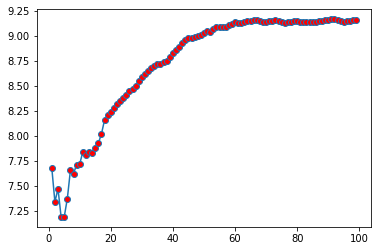

In [187]:
plt.plot(range(1,100), error, marker = 'o', markerfacecolor = 'r')

In [188]:
knn = KNeighborsRegressor(n_neighbors=5)

In [189]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn.predict(X_te)